In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import stats
from time import sleep
import scipy.stats
from scipy.stats import kurtosis,skew
import seaborn as sns
import abc
import SQL_connector as SQL

In [61]:
ccdb = pd.read_csv('creditcarddb/creditcard.csv')

In [3]:
ccdb.head(5) 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
%matplotlib inline
#to viualize how data correlates 
def threedplot(x,y,z=0,color='red',marker='x',linestyle='dashed',linewidth=0.3,markersize=0.5,height=90,rotate=45):
    fig = plt.figure(figsize = (8, 8))
    ax = plt.axes(projection = '3d')
    ax.plot3D(x,y,z, color=color, marker='x',linestyle='dashed',linewidth=0.3,markersize=0.5)
    ax.view_init(height,rotate)
    
def twodplot(x,y,color='red',marker='x',linestyle='dashed',linewidth=0.3,markersize=0.5):
    fig = plt.figure(figsize = (6.5, 6.5))
    ax = plt.axes()
    ax.plot(x,y, color=color, marker='x',linestyle='dashed',linewidth=0.3,markersize=0.5)

In [4]:
i = 7
j = 13

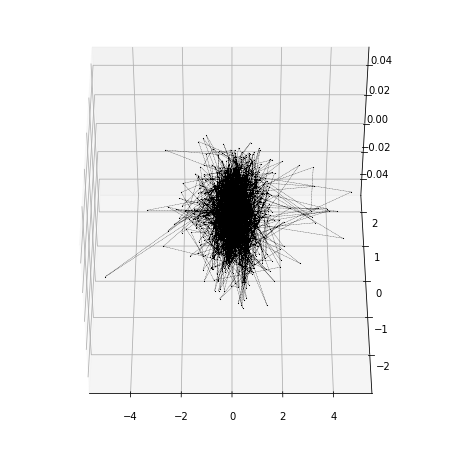

In [6]:
threedplot(ccdb.iloc[0:1000,i],ccdb.iloc[0:1000,j],color="black",height=45,rotate=-90)

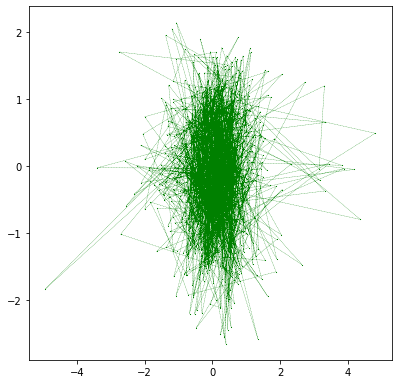

In [7]:
twodplot(ccdb.iloc[0:1000,i],ccdb.iloc[0:1000,j],color="green")

In [13]:
#not a lot of true positives in the dataset, we need to cur down on the data or add some more synthetic data
Y = ccdb.Class
print((Y.sum()/Y.count())*100,'% fraudulent data')

0.1727485630620034 % fraudulent data


In [12]:
#to find out how many unique datapoints we have
for col_name in ccdb.columns:
    if ccdb[col_name].dtypes == 'float64':
        unique_cat = len(ccdb[col_name].unique())
        print("Feature '{col_name}' has '{unique_cat}' unique categories".format(col_name=col_name,unique_cat=unique_cat))
        

Feature 'Time' has '124592' unique categories
Feature 'V1' has '275663' unique categories
Feature 'V2' has '275663' unique categories
Feature 'V3' has '275663' unique categories
Feature 'V4' has '275663' unique categories
Feature 'V5' has '275663' unique categories
Feature 'V6' has '275663' unique categories
Feature 'V7' has '275663' unique categories
Feature 'V8' has '275663' unique categories
Feature 'V9' has '275663' unique categories
Feature 'V10' has '275663' unique categories
Feature 'V11' has '275663' unique categories
Feature 'V12' has '275663' unique categories
Feature 'V13' has '275663' unique categories
Feature 'V14' has '275663' unique categories
Feature 'V15' has '275663' unique categories
Feature 'V16' has '275663' unique categories
Feature 'V17' has '275663' unique categories
Feature 'V18' has '275663' unique categories
Feature 'V19' has '275663' unique categories
Feature 'V20' has '275663' unique categories
Feature 'V21' has '275663' unique categories
Feature 'V22' has 

In [13]:
#To see if we can find something intresting here, The other features are PCA transformed and we cant make much sense of it
ccdb['Amount'].value_counts().sort_values(ascending=False).head(10)

1.00     13688
1.98      6044
0.89      4872
9.99      4747
15.00     3280
0.76      2998
10.00     2950
1.29      2892
1.79      2623
0.99      2304
Name: Amount, dtype: int64

In [29]:
ccdb.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<AxesSubplot:>

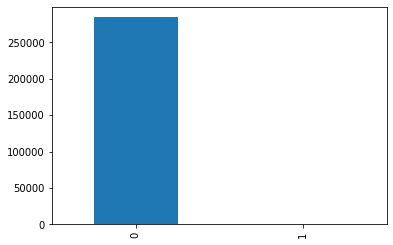

In [30]:
#Skeweness in data can be clearly seen here
ccdb['Class'].value_counts().plot(kind='bar')

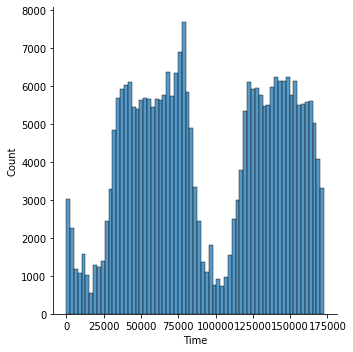

In [31]:
sns.displot(ccdb['Time'])

<AxesSubplot:xlabel='Time', ylabel='Amount'>

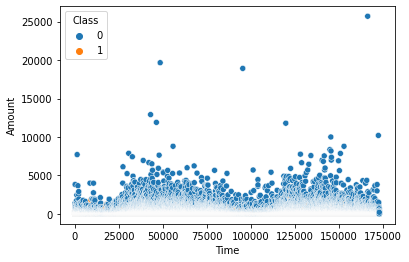

In [32]:
sns.scatterplot(x='Time',y='Amount',hue='Class',data=ccdb)

<AxesSubplot:>

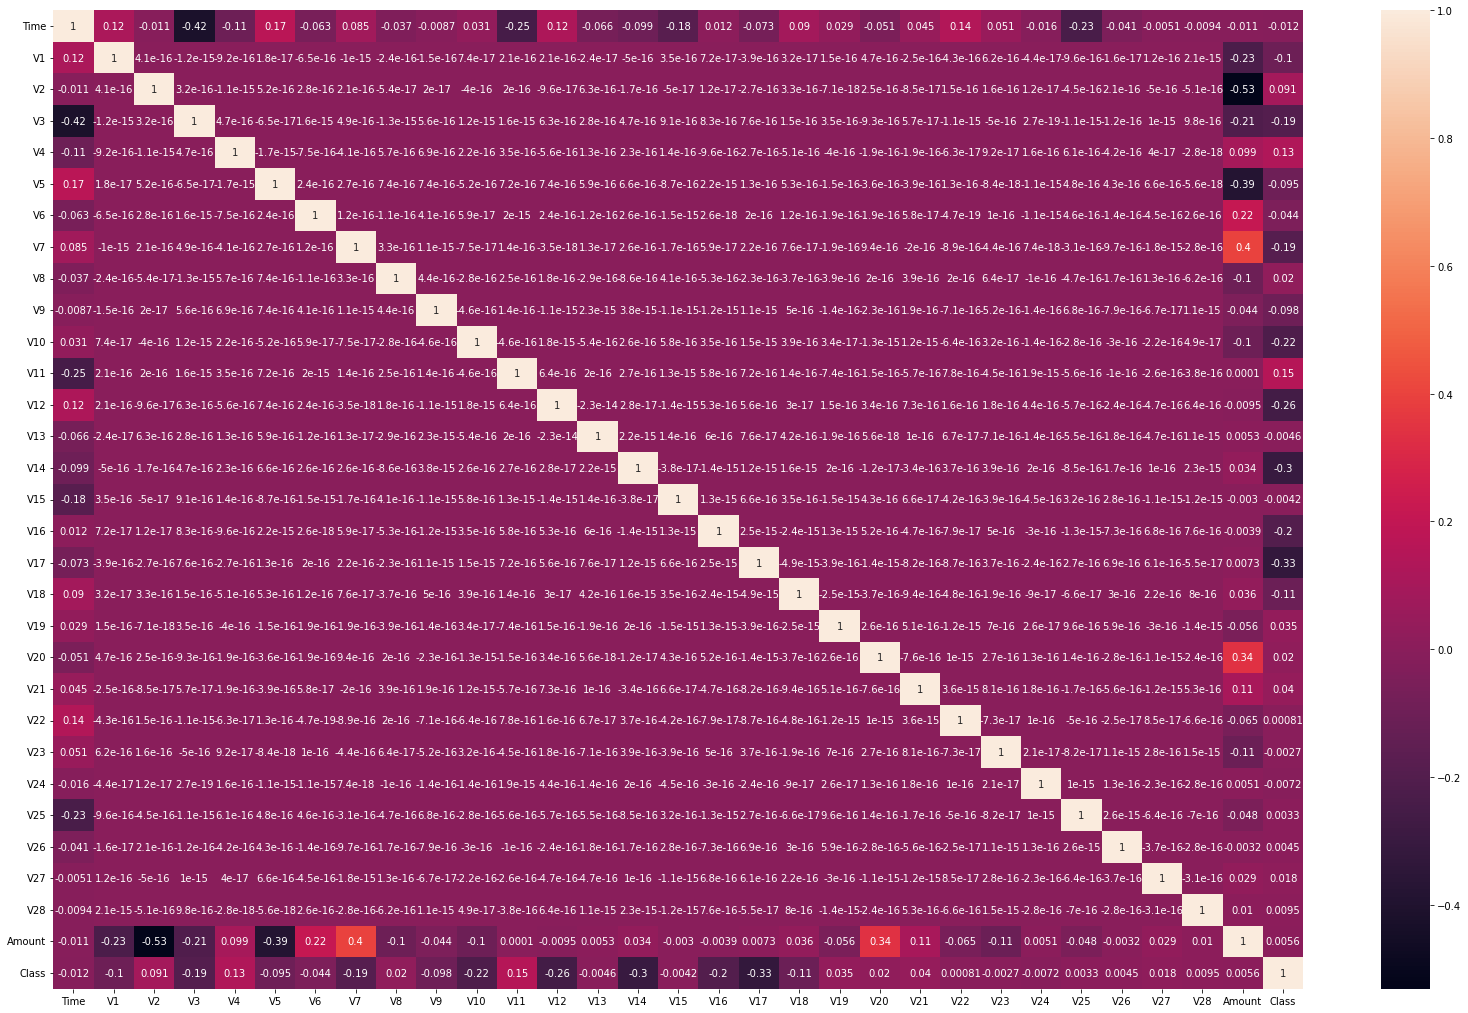

In [33]:
#correlation?
plt.figure(figsize=(28,18))
sns.heatmap(ccdb.corr(),annot=True)

In [14]:
#outlier analysis
def percentile_outliers(features):
    uplo=[]
    for x in features:
        Q1 = np.percentile(ccdb[x], 25,interpolation = 'midpoint')
        Q3 = np.percentile(ccdb[x], 75,interpolation = 'midpoint')
        IQR=Q3-Q1
        upper = Q3 + (1.5*IQR)
        lower = Q3 - (1.5*IQR)
        labels_omitted = ccdb.loc[(ccdb[x] > upper) | (ccdb[x] < lower)]['Class'].sum()
        uplo.append(labels_omitted)
    return uplo

In [15]:
#Most of our positives occur in outliers. Intresting.
percentile_outliers(ccdb.columns[1:-2])

[266,
 254,
 388,
 318,
 279,
 268,
 370,
 271,
 332,
 421,
 298,
 419,
 76,
 451,
 72,
 391,
 413,
 305,
 188,
 223,
 259,
 57,
 217,
 54,
 98,
 39,
 363,
 299]

In [16]:
def normal_dist_analyser(features):
    
    for x in features:
        mean = ccdb[x].mean()
        std = ccdb[x].std()
        mini = np.floor(ccdb[x].min())
        maxi = np.ceil(ccdb[x].max())
        x_axis = np.arange(mini,maxi+1,1)
        y_axis = scipy.stats.norm.pdf(x_axis,mean,std)
        print("minimum:'{mini}', maximum:'{maxi}'".format(mini=mini,maxi=maxi))
        print("Kurtosis:'{k}'".format(k=kurtosis(ccdb[x], bias=False)))
        print("Skewness:'{s}'".format(s=skew(ccdb[x], bias=False)))
        plt.plot(x_axis,y_axis,color='coral')
        plt.title(x)
        plt.grid()
        plt.ylabel('Normal Distribution')
        
        #fill area 1
        pt1 = mean + std
        plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='none')
        pt2 = mean - std
        plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='none')
        ptx = np.linspace(pt1, pt2, 10)
        pty = scipy.stats.norm.pdf(ptx,mean,std)
        plt.fill_between(ptx, pty, color='#0b559f', alpha=1)
        
        #fill area 2
        pt1 = mean + 2*std
        plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='none')
        pt2 = mean - 2*std
        plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='none')
        ptx = np.linspace(pt1, pt2, 10)
        pty = scipy.stats.norm.pdf(ptx,mean,std)
        plt.fill_between(ptx, pty, color='#2b6bba', alpha=0.75)
        
        #fill area 3
        pt1 = mean + 3*std
        plt.plot([pt1 ,pt1 ],[0.0,scipy.stats.norm.pdf(pt1 ,mean, std)], color='none')
        pt2 = mean - 3*std
        plt.plot([pt2 ,pt2 ],[0.0,scipy.stats.norm.pdf(pt2 ,mean, std)], color='none')
        ptx = np.linspace(pt1, pt2, 10)
        pty = scipy.stats.norm.pdf(ptx,mean,std)
        plt.fill_between(ptx, pty, color='#2b72ba', alpha=0.5)
        
        plt.show()


minimum:'-57.0', maximum:'3.0'
Kurtosis:'32.48667948607063'
Skewness:'-3.28066730275604'


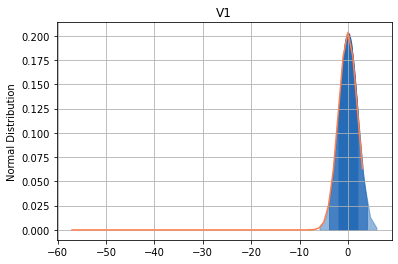

minimum:'-73.0', maximum:'23.0'
Kurtosis:'95.77310596384662'
Skewness:'-4.624865573285336'


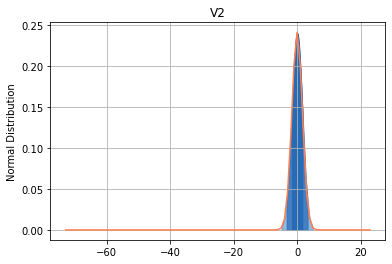

minimum:'-49.0', maximum:'10.0'
Kurtosis:'26.619550806363986'
Skewness:'-2.2401554402404193'


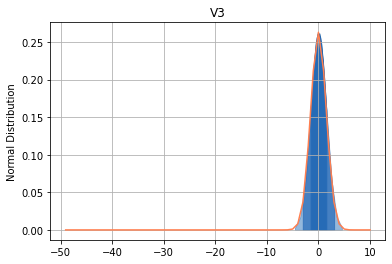

minimum:'-6.0', maximum:'17.0'
Kurtosis:'2.6354549146787125'
Skewness:'0.676292097985747'


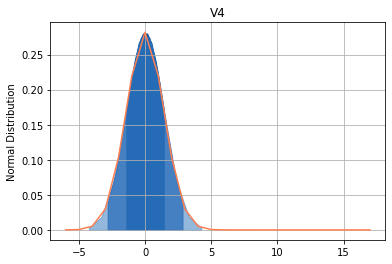

minimum:'-114.0', maximum:'35.0'
Kurtosis:'206.90455995692022'
Skewness:'-2.425901495952054'


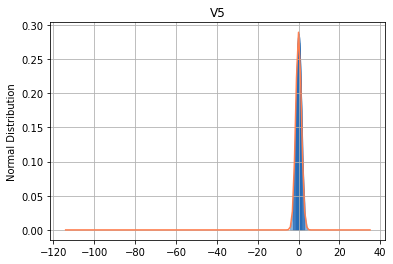

minimum:'-27.0', maximum:'74.0'
Kurtosis:'42.64249396253933'
Skewness:'1.8265806649980845'


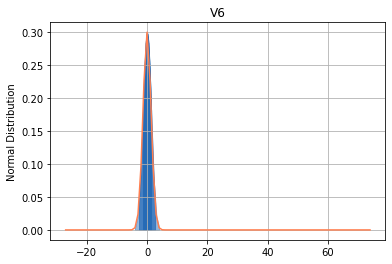

minimum:'-44.0', maximum:'121.0'
Kurtosis:'405.6074170083755'
Skewness:'2.553907417429514'


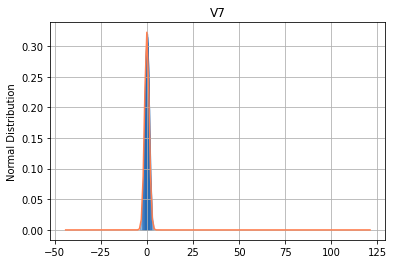

minimum:'-74.0', maximum:'21.0'
Kurtosis:'220.5869736251531'
Skewness:'-8.521944194777975'


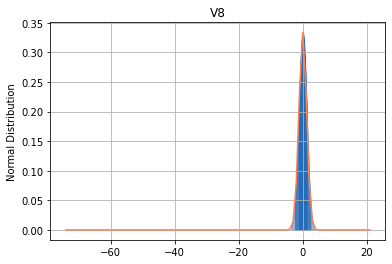

minimum:'-14.0', maximum:'16.0'
Kurtosis:'3.731310614141208'
Skewness:'0.5546797719063509'


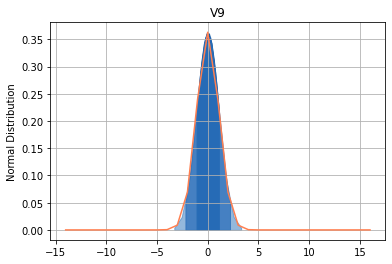

minimum:'-25.0', maximum:'24.0'
Kurtosis:'31.988238779491184'
Skewness:'1.1871405899625276'


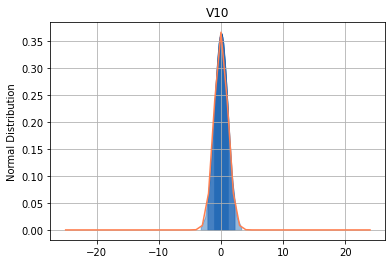

minimum:'-5.0', maximum:'13.0'
Kurtosis:'1.6339212577978675'
Skewness:'0.35650585548882013'


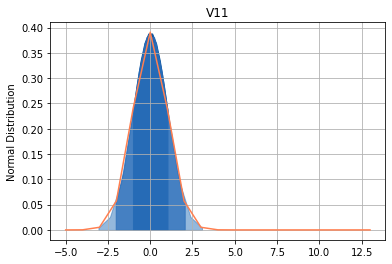

minimum:'-19.0', maximum:'8.0'
Kurtosis:'20.24186966222543'
Skewness:'-2.2784009354106174'


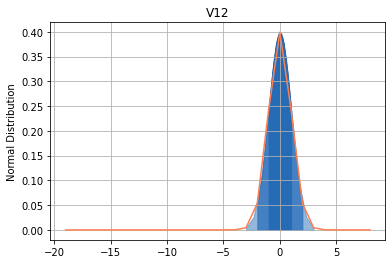

minimum:'-6.0', maximum:'8.0'
Kurtosis:'0.19529978783246627'
Skewness:'0.06523345790658322'


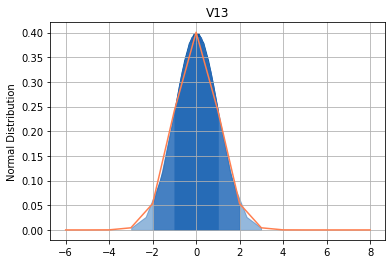

minimum:'-20.0', maximum:'11.0'
Kurtosis:'23.879461844938454'
Skewness:'-1.9951758402683302'


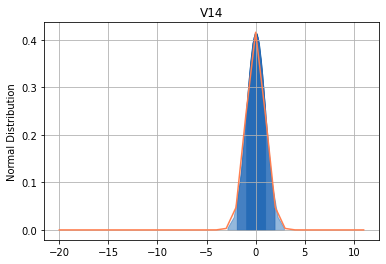

minimum:'-5.0', maximum:'9.0'
Kurtosis:'0.2847690837606822'
Skewness:'-0.30842298213592384'


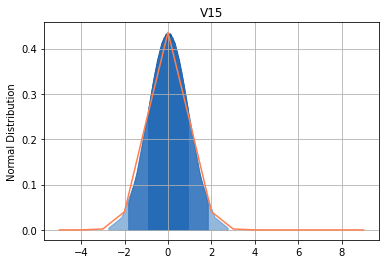

minimum:'-15.0', maximum:'18.0'
Kurtosis:'10.419131320644889'
Skewness:'-1.100966276051066'


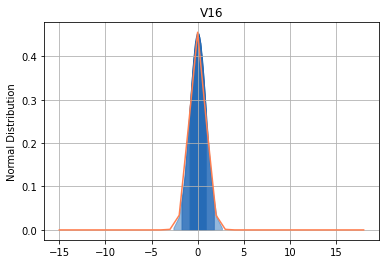

minimum:'-26.0', maximum:'10.0'
Kurtosis:'94.79971910397428'
Skewness:'-3.8449144738706194'


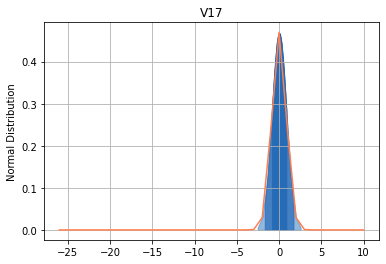

minimum:'-10.0', maximum:'6.0'
Kurtosis:'2.5783408337335967'
Skewness:'-0.2598802680943059'


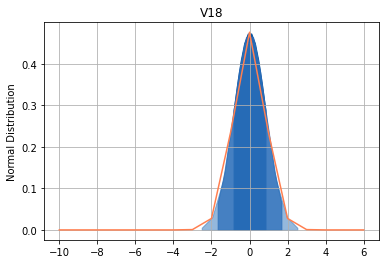

minimum:'-8.0', maximum:'6.0'
Kurtosis:'1.724969781227509'
Skewness:'0.10919175998147104'


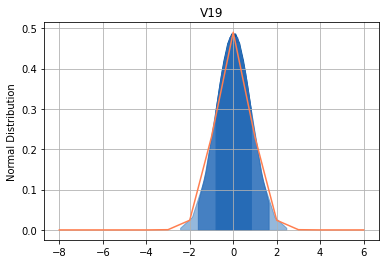

minimum:'-55.0', maximum:'40.0'
Kurtosis:'271.01611295041533'
Skewness:'-2.0371552990813986'


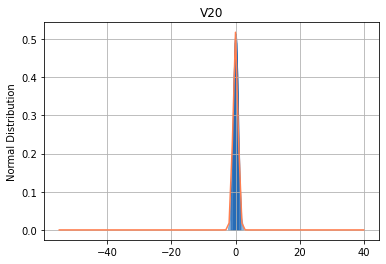

minimum:'-35.0', maximum:'28.0'
Kurtosis:'207.287040353334'
Skewness:'3.5929911930778453'


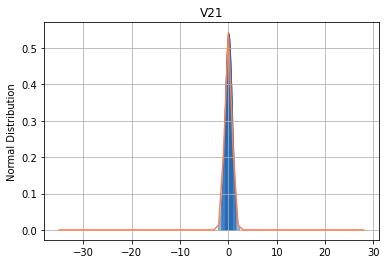

minimum:'-11.0', maximum:'11.0'
Kurtosis:'2.8329665163717834'
Skewness:'-0.21325762284328817'


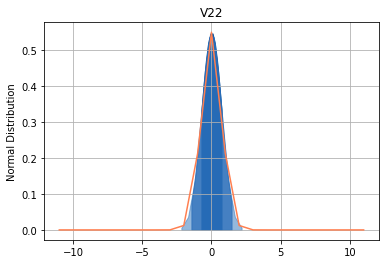

minimum:'-45.0', maximum:'23.0'
Kurtosis:'440.08865867495405'
Skewness:'-5.875140340106818'


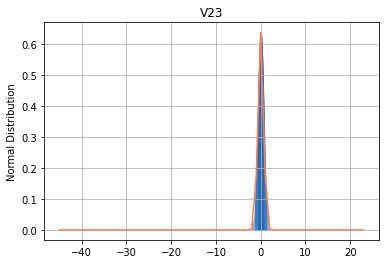

minimum:'-3.0', maximum:'5.0'
Kurtosis:'0.6188707999933465'
Skewness:'-0.5524993011673046'


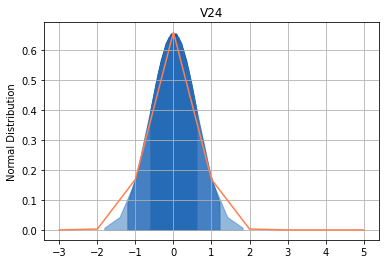

minimum:'-11.0', maximum:'8.0'
Kurtosis:'4.290412283119672'
Skewness:'-0.4157925903156349'


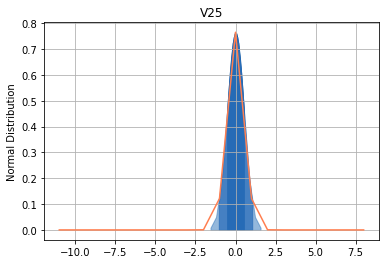

minimum:'-3.0', maximum:'4.0'
Kurtosis:'0.9190057708796124'
Skewness:'0.5766926172084217'


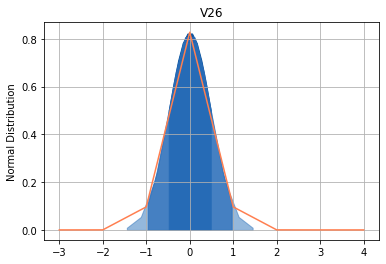

minimum:'-23.0', maximum:'32.0'
Kurtosis:'244.98924056630815'
Skewness:'-1.1702089424327136'


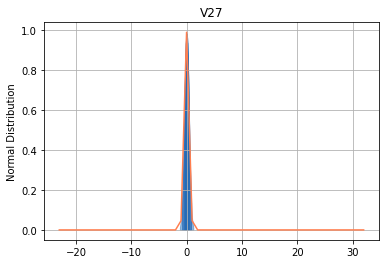

minimum:'-16.0', maximum:'34.0'
Kurtosis:'933.3975020960185'
Skewness:'11.192091192212809'


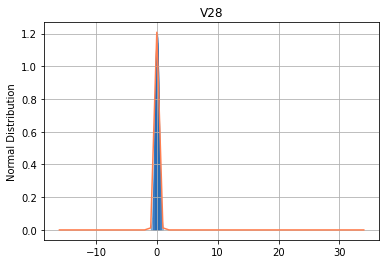

In [17]:
#To determine if I can go ahead and use Z outliers, need to make sure data is kinda normally distributed. given the volume of samples Central limit Theorem should work in our favour here
#postive kurtosis = heavy tails (more outliers)
normal_dist_analyser(ccdb.columns[1:-2])

In [19]:
def Z_outliers(features):
    uplo=[]
    for x in features:
        labels_omitted = ccdb.loc[(np.abs(ccdb[x].mean() - ccdb[x]))/ccdb[x].std()>3]['Class'].sum()
        uplo.append(labels_omitted)
    return uplo

In [26]:
#This confirms that we cant just get rid of outliers, infact, most of the true positives lie within outliers.
Z_outliers(ccdb.columns[1:-2])

[128,
 130,
 271,
 241,
 146,
 47,
 218,
 107,
 160,
 326,
 290,
 369,
 3,
 411,
 6,
 292,
 369,
 213,
 74,
 33,
 79,
 26,
 27,
 2,
 36,
 2,
 139,
 44]

<AxesSubplot:xlabel='V12', ylabel='Density'>

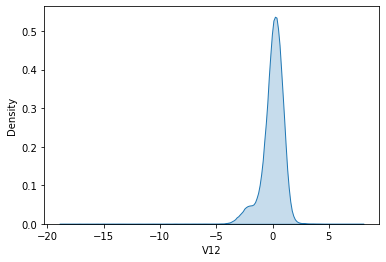

In [27]:
#More visualisation
sns.kdeplot(ccdb.V12,shade=True)

/home/heavyblanket/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/heavyblanket/.local/lib/python3.9/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='V25', ylabel='V23'>

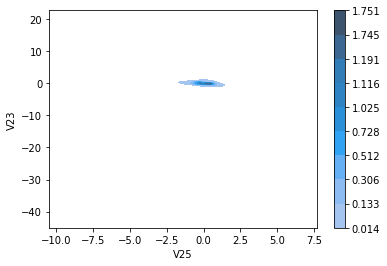

In [28]:
sns.kdeplot(ccdb.V25,ccdb.V23,shade=True,shade_lowest=False,cbar=True)

# I experimented with different feature selection techniques below, but I dont use it on my final dataset; I found a better way.

In [62]:
def split_scale_data(df_x,df_y,test_size=0.2):
    
    x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2) 
    Scalar = StandardScaler()
    Scalar.fit(x_train)
    x_train = Scalar.transform(x_train)
    x_test = Scalar.transform(x_test)
    
    return x_train,y_train

In [63]:
#To explore feature importance (ANOVA/F-score)
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

x_train,y_train = split_scale_data(ccdb.iloc[:,:-1],ccdb.iloc[:,-1])

selector = SelectKBest(f_classif, k=20)
selector.fit(x_train,y_train)

selector.scores_

cols = selector.get_support(indices=True)
cols

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 16, 17, 18, 19,
       20, 21, 27])

In [64]:
ccdb = ccdb.iloc[:,list(cols)]
ccdb

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V21,V27
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.133558
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.008983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.055353
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.062723
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.219422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.943651
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.068472
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.004455
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.108821


In [34]:
#Input is numerical, hence its not wise to use Mutual info or Chi Square. I wont use this blocks output for analysis
#To explore feature importance (mutual)
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif

x_train,y_train = split_scale_data(ccdb.iloc[:,:-1],ccdb.iloc[:,-1])

selector = SelectKBest(score_func=mutual_info_classif, k=27)
selector.fit(x_train,y_train)

selector.scores_

cols = selector.get_support(indices=True)
cols

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 16, 17, 18,
       19, 20, 21, 23, 24, 25, 26, 27, 28, 29])

In [35]:
selector.scores_

array([0.00202447, 0.00203446, 0.00314958, 0.00485622, 0.00511025,
       0.00235347, 0.00220516, 0.00399561, 0.00183232, 0.00433444,
       0.00754883, 0.00690401, 0.00758783, 0.00032626, 0.00813593,
       0.00020669, 0.00607354, 0.00801018, 0.0041541 , 0.00146942,
       0.00100299, 0.00236757, 0.00028948, 0.00080769, 0.00054966,
       0.00044253, 0.00044183, 0.00224657, 0.00166525, 0.00134058])

In [37]:
#Using other methods to find important features 
#I dont really use this
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel, RFECV
from sklearn.metrics import accuracy_score


x_train,y_train = split_scale_data(ccdb.iloc[:,:-1],ccdb.iloc[:,-1])

sel = SelectFromModel(DecisionTreeClassifier())
sel.fit(x_train,y_train)
sel.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False])

In [38]:
x_train.columns[sel.get_support()]

Index(['V10', 'V14', 'V17', 'V27'], dtype='object')

In [39]:
dt = DecisionTreeClassifier()
rfcev = RFECV(estimator=dt,step=1,scoring='accuracy')
rfcev.fit(x_train,y_train)
sel.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False])

In [40]:
x_train.columns[sel.get_support()]

Index(['V10', 'V14', 'V17', 'V27'], dtype='object')

In [42]:
#PCA for feature reduction.
#I dont use this either.
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [47]:
x_train,y_train = split_scale_data(ccdb.iloc[:,:-1],ccdb.iloc[:,-1])

#Transform data bedore PCA
scalar =  StandardScaler()
scalar.fit(x_train)
x_train = scalar.transform(x_train)
x_test = scalar.transform(x_test)

#Apply PCA
pca = PCA(n_components=30)
pca.fit(x_train)

x_train = pca.transform(x_train)
x_test = pca.transform(x_train)

In [235]:
#I was testing my SQL database on GCP this is not required, I left this code here for my reference
import sqlite3
import mysql.connector
import getpass

class sqllogin:
    
    def __init__(self):
        self.password = getpass.getpass(prompt='Password: ', stream=None)
        self.connection(self.password)

    def connection(self,password):
        self.conn = mysql.connector.connect(user='xyz', password=password, host='external ip here', database='Features')
        self.cursor = self.conn.cursor(buffered=True)
        return self.cursor
    
sql = sqllogin()
    

Password: ········


In [306]:
class queries:
    
    def __init__(self,ccdb):
        self.debug = False
        self.ccdb = ccdb
        self.getLabels(self.ccdb)
    
    def dropTable(self,table):
        q = (("".join(['DROP TABLE ',table, ';'])))
        sql.cursor.execute(q)
        
        if self.debug == True: print(q)
            
    def createTable(self,table):
        q = (("".join(['CREATE TABLE ',table, '(ID int NOT NULL AUTO_INCREMENT, PRIMARY KEY(ID));'])))
        sql.cursor.execute(q)
        
        if self.debug == True: print(q)
        
    def modifyTable(self,ccdb,table):
        for column in ccdb.columns:
            q = (("".join(['ALTER TABLE ',table,' ADD ',column,' float(7);'])))
            sql.cursor.execute(q)
            
            if self.debug == True: print(q)
                
    def getLabels(self,ccdb):
        conc = []
        for column in ccdb.columns:
            conc.append(column)
            
        self.labels = (str(conc).replace('[','').replace(']','').replace(' ','').replace("'",""))
        return self.labels
    
    def insert(self,ccdb,table,labels):
        for i in range(0,100):
            s = str(list(ccdb.iloc[i,:].to_numpy().astype('float16'))).replace('[','').replace(']','')
            q = "".join(['INSERT INTO ', table, ' (',labels,') VALUES ','(',s,');'])
            sql.cursor.execute(q)
            
            if self.debug == True: print(q)
            
q = queries(ccdb)

In [307]:
table = 'ANOVA'
q.debug=True
q.dropTable(table)
q.createTable(table)
q.modifyTable(q.ccdb,table)
q.insert(q.ccdb,table,q.labels)

DROP TABLE ANOVA;
CREATE TABLE ANOVA(ID int NOT NULL AUTO_INCREMENT, PRIMARY KEY(ID));
ALTER TABLE ANOVA ADD V1 float(7);
ALTER TABLE ANOVA ADD V2 float(7);
ALTER TABLE ANOVA ADD V3 float(7);
ALTER TABLE ANOVA ADD V4 float(7);
ALTER TABLE ANOVA ADD V5 float(7);
ALTER TABLE ANOVA ADD V6 float(7);
ALTER TABLE ANOVA ADD V7 float(7);
ALTER TABLE ANOVA ADD V8 float(7);
ALTER TABLE ANOVA ADD V9 float(7);
ALTER TABLE ANOVA ADD V10 float(7);
ALTER TABLE ANOVA ADD V11 float(7);
ALTER TABLE ANOVA ADD V12 float(7);
ALTER TABLE ANOVA ADD V14 float(7);
ALTER TABLE ANOVA ADD V16 float(7);
ALTER TABLE ANOVA ADD V17 float(7);
ALTER TABLE ANOVA ADD V18 float(7);
ALTER TABLE ANOVA ADD V19 float(7);
ALTER TABLE ANOVA ADD V20 float(7);
ALTER TABLE ANOVA ADD V21 float(7);
ALTER TABLE ANOVA ADD V27 float(7);
INSERT INTO ANOVA (V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V21,V27) VALUES (-1.359, -0.07275, 2.537, 1.378, -0.3384, 0.4624, 0.2396, 0.0987, 0.3638, 0.0908, -0.552, -0.6177, -0.31

INSERT INTO ANOVA (V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V21,V27) VALUES (-0.535, 0.865, 1.352, 0.1476, 0.4336, 0.087, 0.693, 0.1797, -0.2856, -0.4824, 0.8716, 0.8535, 0.10223, -0.286, -0.3096, -0.4038, -0.8237, -0.2832, 0.04953, -0.0783);
INSERT INTO ANOVA (V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V21,V27) VALUES (-0.2461, 0.4734, 1.695, 0.2625, -0.010864, -0.611, 0.794, -0.2472, 0.1389, -0.4011, -0.812, -0.1835, -0.2861, -0.4282, -0.03061, -0.5044, 0.3552, 0.04572, -0.1946, -0.1753);
INSERT INTO ANOVA (V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V21,V27) VALUES (-1.452, 1.765, 0.612, 1.177, -0.446, 0.2468, -0.2576, 1.093, -0.6074, 0.04715, 0.7837, 1.097, 0.7686, -0.8086, 0.7104, -0.11835, 0.9795, 0.00871, 0.0823, 0.1492);
INSERT INTO ANOVA (V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V21,V27) VALUES (0.9966, -0.12256, 0.547, 0.7065, 0.1345, 1.157, -0.2947, 0.4075, 0.338, -0.4082, 0.6826, 1.254, -0.03

INSERT INTO ANOVA (V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V21,V27) VALUES (1.007, -0.0711, 0.3477, 1.33, -0.1932, 0.1554, 0.008575, 0.1465, 0.1038, 0.03183, 1.071, 0.9404, 0.3801, -0.4934, 0.04355, -0.4053, -0.0926, -0.0914, -0.02023, 0.02136);
INSERT INTO ANOVA (V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V21,V27) VALUES (-0.3782, 0.733, -0.1202, 0.1858, 2.594, 3.797, 0.05908, 0.9766, -0.4126, 0.006752, -0.6245, -0.11584, 0.1405, -0.602, -0.1444, 0.2216, 1.455, 0.3157, -0.1076, 0.4114);
INSERT INTO ANOVA (V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V21,V27) VALUES (1.198, 0.2368, 0.51, 0.6577, -0.3655, -0.745, 0.07947, -0.1305, -0.05228, -0.11005, 0.3071, 0.671, 0.269, -0.1969, 0.0077, -1.123, -0.591, -0.121, -0.1499, -0.0164);
INSERT INTO ANOVA (V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V19,V20,V21,V27) VALUES (-0.5806, 0.4827, 1.333, -0.2532, -0.02847, -0.519, 0.5034, 0.1178, 0.1171, -0.4204, 0.4497, -0.01787